In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Import Library**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import math
from statsmodels.tsa.stattools import adfuller

# **Fungsi Metode BDES Melatih Model (Data Training)**

In [ ]:
def bdesmodel(data, alpha, slope, konstanta, pred_test,nilai_Bt):
  s1 = np.zeros(len(data))                       #variabel untuk menyimpan nilai pemulusan pertama
  s2= np.zeros(len(data))                       #variabel untuk menyimpan nilai pemulusan kedua
  prediksi = np.zeros(len(data))
  for i in range(len(data)):
    if i < 4:
      nilai_Bt[i]=data.iloc[i][ 1]
      s1[i] = alpha*data.iloc[i][ 1] + (1-alpha) * nilai_Bt[i]
      s2[i] = alpha*s1[i] + (1-alpha) * nilai_Bt[i]
      konstanta[i] = 2*s1[i] - s2[i]
    if i >=4:
      s1[i] = alpha*data.iloc[i][ 1] + (1-alpha) * nilai_Bt[i]
      s2[i] = alpha*s1[i] + (1-alpha) * nilai_Bt[i]
      konstanta[i] = 2*s1[i] - s2[i]

    slope[i] = alpha/(1-alpha) * (s1[i] - s2[i])
    prediksi[i]= konstanta[i] + slope[i]*1

  for i in range(len(pred_test)):
    pred_test[i]= konstanta[len(slope)-1]+ slope[len(slope)-1] *(i+1)

  return  prediksi

# **FUNGSI PREDIKSI PERIODE DEPAN**

In [ ]:
def prediksi_depan(periodedepan, konstanta, slope, testing, panjangperiode):
  temp = len(testing)
  for i in range (panjangperiode):
    data= konstanta[len(slope)-1]+ slope[len(slope)-1] *temp
    temp = temp+1
    periodedepan.append(data)

# **Fungsi Perhitungan Mape**

In [ ]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

# **Bawang Merah**

In [ ]:
merah = pd.read_excel('/content/Bawang Merah_fix.xlsx')
merah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,02/ 01/ 2018,19650,NaN,NaN,NaN
1,03/ 01/ 2018,19600,NaN,NaN,NaN
2,04/ 01/ 2018,19550,NaN,NaN,NaN
3,05/ 01/ 2018,19450,NaN,NaN,NaN
4,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN
1430,27/ 06/ 2023,36450,NaN,NaN,NaN
1431,28/ 06/ 2023,36450,NaN,NaN,NaN
1432,29/ 06/ 2023,36450,NaN,NaN,NaN


In [ ]:
print('Harga Bawang Merah tertinggi = ',merah["Harga"].max())
print('Harga Bawang Merah terendah = ',merah["Harga"].min())
print('Harga Bawang Merah rata-rata =', merah["Harga"].mean())

Harga Bawang Merah tertinggi =  71300
Harga Bawang Merah terendah =  14750
Harga Bawang Merah rata-rata = 28825.785216178523


In [ ]:
panjangprediksi = 365
index = np.arange(len(merah),(len(merah) + panjangprediksi))

In [ ]:
periodedepanmerah = []

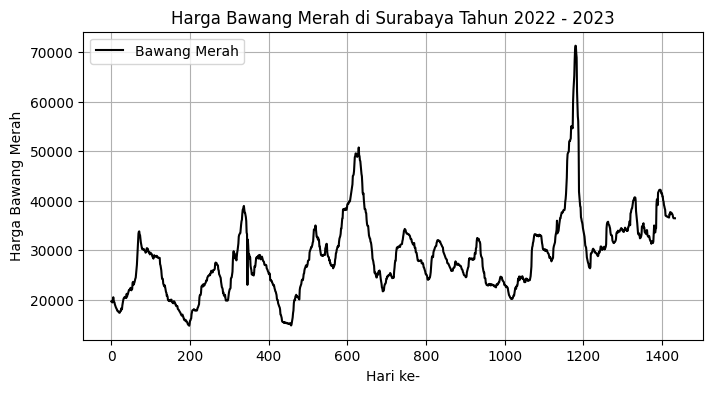

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(merah['Harga'], label='Bawang Merah', color = 'black')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah')
plt.title('Harga Bawang Merah di Surabaya Tahun 2022 - 2023')
plt.grid(True)
plt.legend()

In [ ]:
#Q1 = np.quantile(merah, .25)
#Q3 = np.quantile(merah, .75)

In [ ]:
Datates = 125  #246
trainmerah = merah.iloc[:-Datates] #76%
testmerah = merah.iloc[-Datates:]  #24%
trainmerah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,02/ 01/ 2018,19650,NaN,NaN,NaN
1,03/ 01/ 2018,19600,NaN,NaN,NaN
2,04/ 01/ 2018,19550,NaN,NaN,NaN
3,05/ 01/ 2018,19450,NaN,NaN,NaN
4,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
1304,02/ 01/ 2023,34000,NaN,NaN,NaN
1305,03/ 01/ 2023,34100,NaN,NaN,NaN
1306,04/ 01/ 2023,34550,NaN,NaN,NaN
1307,05/ 01/ 2023,34450,NaN,NaN,NaN


In [ ]:
testmerah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
1309,09/ 01/ 2023,34150,NaN,NaN,NaN
1310,10/ 01/ 2023,33950,NaN,NaN,NaN
1311,11/ 01/ 2023,34100,NaN,NaN,NaN
1312,12/ 01/ 2023,33900,NaN,NaN,NaN
1313,13/ 01/ 2023,33950,NaN,NaN,NaN
...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN
1430,27/ 06/ 2023,36450,NaN,NaN,NaN
1431,28/ 06/ 2023,36450,NaN,NaN,NaN
1432,29/ 06/ 2023,36450,NaN,NaN,NaN


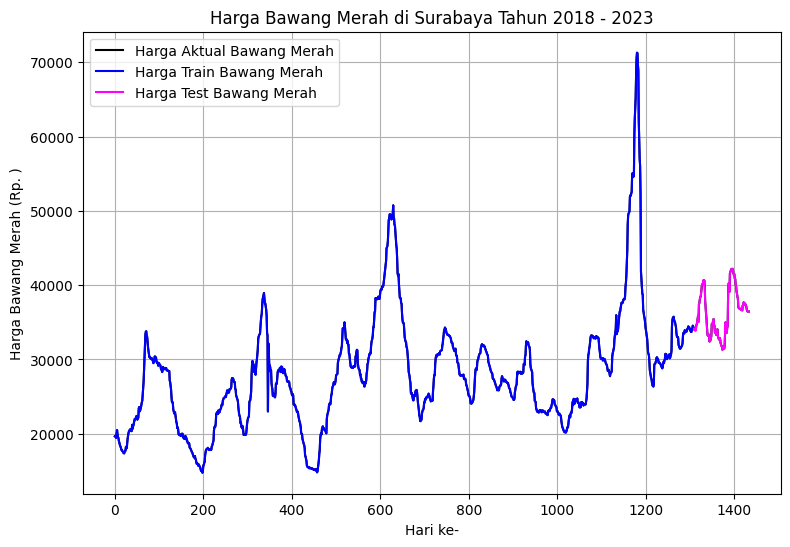

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(merah['Harga'], label='Harga Aktual Bawang Merah', color='black')
plt.plot(trainmerah['Harga'], label='Harga Train Bawang Merah', color='blue')
plt.plot(testmerah['Harga'], label='Harga Test Bawang Merah', color='magenta')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah (Rp. )')
plt.title('Harga Bawang Merah di Surabaya Tahun 2018 - 2023')
plt.grid(True)
plt.legend()

In [ ]:
print ('Results of Dicky-Fuller Test data Harga Bawang Merah :')
dftest = adfuller(merah['Harga'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P=value', '#Lags Used', 'Number pf Observations Use'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key] = value
  print(dfoutput)

Results of Dicky-Fuller Test data Harga Bawang Merah :
Test Statistic                  -3.502046
P=value                          0.007935
#Lags Used                      10.000000
Number pf Observations Use    1423.000000
Critical value (1%)             -3.434954
dtype: float64
Test Statistic                  -3.502046
P=value                          0.007935
#Lags Used                      10.000000
Number pf Observations Use    1423.000000
Critical value (1%)             -3.434954
Critical value (5%)             -2.863573
dtype: float64
Test Statistic                  -3.502046
P=value                          0.007935
#Lags Used                      10.000000
Number pf Observations Use    1423.000000
Critical value (1%)             -3.434954
Critical value (5%)             -2.863573
Critical value (10%)            -2.567852
dtype: float64


In [ ]:
Q1 = np.quantile(merah['Harga'], .25)
Q3 = np.quantile(merah['Harga'], .75)
print(Q1)
print(Q3)

23675.0
32900.0


# **Variabel**

In [ ]:
alpha_manual = 0.2 #alpha manual
test_merah = np.zeros(len(testmerah))
kons_m = np.zeros(len(trainmerah))
slope_m = np.zeros(len(trainmerah))
#alpha_optimum = 0

# **Perhitungan Nilai Dasar Untuk Data Bawang Merah**

In [ ]:
Bt_m = np.zeros(len(trainmerah))
weights = [5, 4, 3, 2, 1]
Bt_m = trainmerah['Harga'].rolling(5).apply(lambda data: np.dot(data, weights) / sum(weights), raw = True)

Bt_m

0                NaN
1                NaN
2                NaN
3                NaN
4       19620.000000
            ...     
1304    33880.000000
1305    33883.333333
1306    33870.000000
1307    34023.333333
1308    34206.666667
Name: Harga, Length: 1309, dtype: float64

# **Pemulusan Golden Section Bawang Merah**

In [ ]:
r = 0.61803
a = 0
d = 1
epsilon = 0.00000001
iter = 50
r = (-1+math.sqrt(5))/2
k = 0
b = r * a + (1 - r) * d
c = a + d - b
while ((abs(d-a) > epsilon) and (k < iter)):
    k = k + 1
    fb = bdesmodel(trainmerah, b, slope_m, kons_m, test_merah, Bt_m)
    mapefb = mape(testmerah['Harga'], test_merah)
    fc = bdesmodel(trainmerah, c, slope_m, kons_m, test_merah, Bt_m)
    mapefc = mape(testmerah['Harga'], test_merah)
    if(mapefb < mapefc):
        d = c
        c = b
        b = r * a + (1 - r) * d
    else:
        a = b
        b = c
        c = a + d - b

alpha_optimal_merah = a + d /2

print(a)
print(r)
print(b)
print(alpha_optimal_merah)

0
0.6180339887498949
2.7008890848809978e-09
3.5355097120310263e-09


In [ ]:
x1 = a*r + (1-r)*b
print(x1)

x2 = a+b-x1
print(x2)

1.0316478305809412e-09
1.6692412543000565e-09


In [ ]:
print(b)
print(c)

2.7008890848809978e-09
4.3701303391810556e-09


# **Prediksi Bawang Merah Dengan Golden Section**

In [ ]:
prediksi = bdesmodel(trainmerah, alpha_manual, slope_m, kons_m, test_merah, Bt_m)
#trainmerah = trainmerah.assign(prediksi_m = prediksi)
#trainmerah = trainmerah.assign(prediksi_m = prediksi)
trainmerah = trainmerah.assign(alpha_optimal_merah = prediksi)
testmerah = testmerah.assign(alpha_optimal_merah = test_merah)
trainmerah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4,alpha_optimal_merah
0,02/ 01/ 2018,19650,NaN,NaN,NaN,19650.0
1,03/ 01/ 2018,19600,NaN,NaN,NaN,19600.0
2,04/ 01/ 2018,19550,NaN,NaN,NaN,19550.0
3,05/ 01/ 2018,19450,NaN,NaN,NaN,19450.0
4,08/ 01/ 2018,20100,NaN,NaN,NaN,19812.0
...,...,...,...,...,...,...
1304,02/ 01/ 2023,34000,NaN,NaN,NaN,33928.0
1305,03/ 01/ 2023,34100,NaN,NaN,NaN,33970.0
1306,04/ 01/ 2023,34550,NaN,NaN,NaN,34142.0
1307,05/ 01/ 2023,34450,NaN,NaN,NaN,34194.0


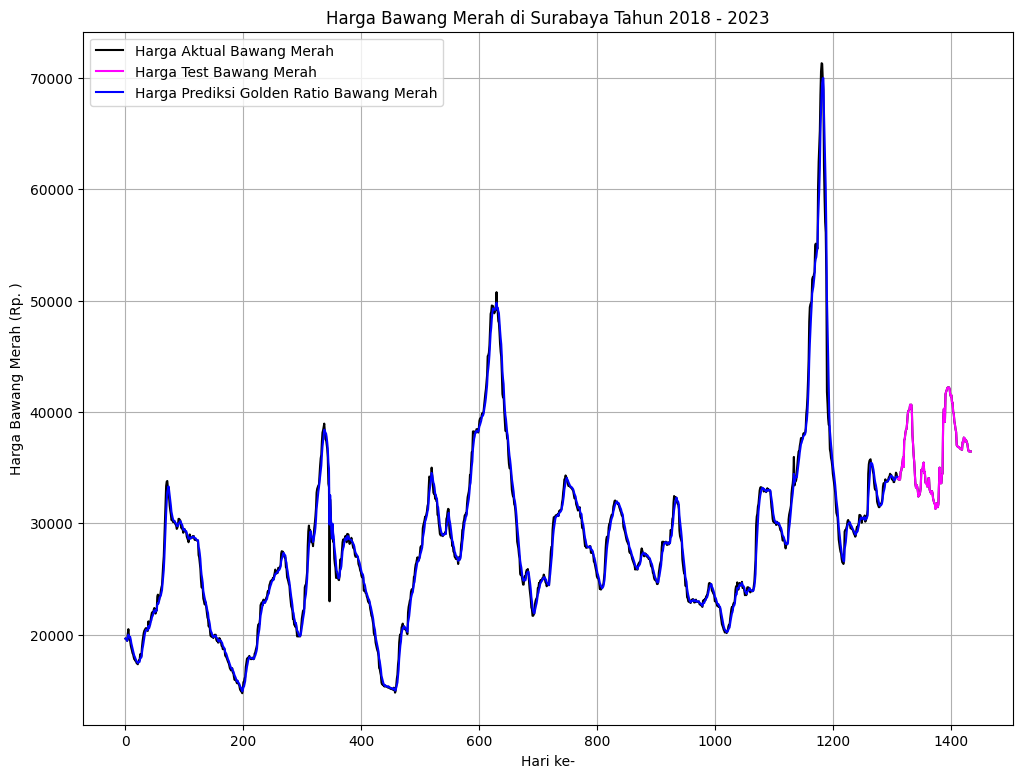

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(merah['Harga'], label='Harga Aktual Bawang Merah', color='black')
plt.plot(testmerah['Harga'], label='Harga Test Bawang Merah', color= 'magenta')
plt.plot(trainmerah['alpha_optimal_merah'], label='Harga Prediksi Golden Ratio Bawang Merah', color= 'blue')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah (Rp. )')
plt.title('Harga Bawang Merah di Surabaya Tahun 2018 - 2023')
plt.grid(True)
plt.legend()

In [ ]:
trainmerah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4,alpha_optimal_merah
0,02/ 01/ 2018,19650,NaN,NaN,NaN,19650.0
1,03/ 01/ 2018,19600,NaN,NaN,NaN,19600.0
2,04/ 01/ 2018,19550,NaN,NaN,NaN,19550.0
3,05/ 01/ 2018,19450,NaN,NaN,NaN,19450.0
4,08/ 01/ 2018,20100,NaN,NaN,NaN,19812.0
...,...,...,...,...,...,...
1304,02/ 01/ 2023,34000,NaN,NaN,NaN,33928.0
1305,03/ 01/ 2023,34100,NaN,NaN,NaN,33970.0
1306,04/ 01/ 2023,34550,NaN,NaN,NaN,34142.0
1307,05/ 01/ 2023,34450,NaN,NaN,NaN,34194.0


In [ ]:
testmerah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4,alpha_optimal_merah
1309,09/ 01/ 2023,34150,NaN,NaN,NaN,34184.000000
1310,10/ 01/ 2023,33950,NaN,NaN,NaN,34181.733333
1311,11/ 01/ 2023,34100,NaN,NaN,NaN,34179.466667
1312,12/ 01/ 2023,33900,NaN,NaN,NaN,34177.200000
1313,13/ 01/ 2023,33950,NaN,NaN,NaN,34174.933333
...,...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN,33912.000000
1430,27/ 06/ 2023,36450,NaN,NaN,NaN,33909.733333
1431,28/ 06/ 2023,36450,NaN,NaN,NaN,33907.466667
1432,29/ 06/ 2023,36450,NaN,NaN,NaN,33905.200000


In [ ]:
prediksi_depan(periodedepanmerah, kons_m, slope_m, testmerah, panjangprediksi)

In [ ]:
dataprediksi_m = pd.DataFrame(index)
dataprediksi_m['prediksi']= periodedepanmerah
dataprediksi_m = dataprediksi_m.rename(columns = {0: "index"})
dataprediksi_m = dataprediksi_m.set_index("index")
dataprediksi_m

,prediksi
index,
1434,33902.933333
1435,33900.666667
1436,33898.400000
1437,33896.133333
1438,33893.866667
...,...
1794,33086.933333
1795,33084.666667
1796,33082.400000


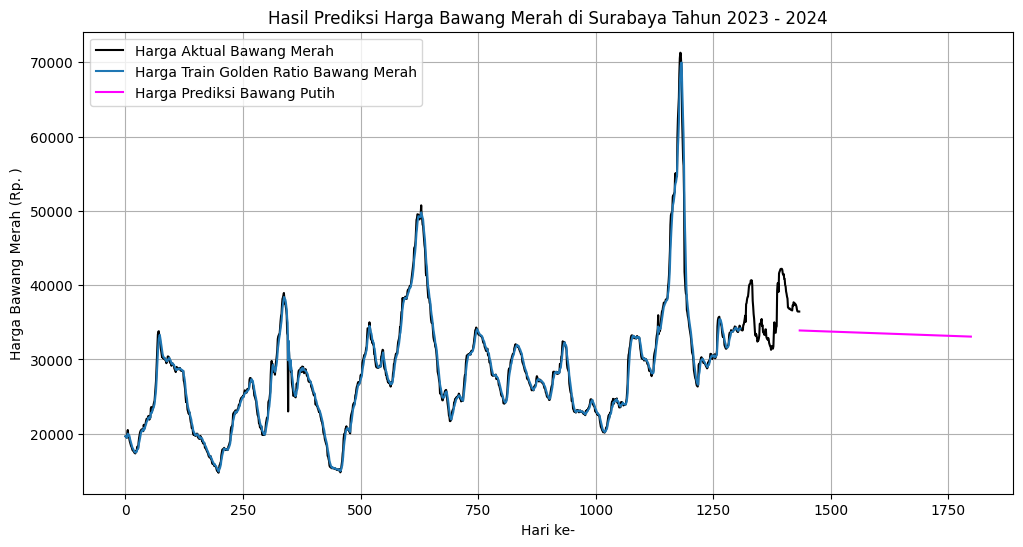

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(merah['Harga'], label='Harga Aktual Bawang Merah', color='black')
#plt.plot(testmerah['Harga'], label='Harga Test Bawang Merah')
plt.plot(trainmerah['alpha_optimal_merah'], label='Harga Train Golden Ratio Bawang Merah')
plt.plot(dataprediksi_m['prediksi'], label='Harga Prediksi Bawang Putih', color='magenta')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Merah (Rp. )')
plt.title('Hasil Prediksi Harga Bawang Merah di Surabaya Tahun 2023 - 2024')
plt.grid(True)
plt.legend()

In [ ]:
#pd.to_datetime(dataprediksi_m)
dataprediksi_m

,prediksi
index,
1434,33902.933333
1435,33900.666667
1436,33898.400000
1437,33896.133333
1438,33893.866667
...,...
1794,33086.933333
1795,33084.666667
1796,33082.400000


In [ ]:
print('Harga Bawang Merah tertinggi = ',merah["Harga"].max())
print('Harga Bawang Merah terendah = ',merah["Harga"].min())
print('Harga Bawang Merah rata-rata =', merah["Harga"].mean())

Harga Bawang Merah tertinggi =  71300
Harga Bawang Merah terendah =  14750
Harga Bawang Merah rata-rata = 28825.785216178523


In [ ]:
mape(trainmerah['Harga'], trainmerah['alpha_optimal_merah'])

1.6562686271592093

In [ ]:
mape(testmerah['Harga'], test_merah)

7.80289730677723

# **Bawang Putih**

In [ ]:
putih = pd.read_excel('/content/Fix_Bawang Putih_fix.xlsx')
putih

,Tanggal,Harga
0,02/ 01/ 2018,17850
1,03/ 01/ 2018,18450
2,04/ 01/ 2018,18300
3,05/ 01/ 2018,18750
4,08/ 01/ 2018,18900
...,...,...
1440,11/ 07/ 2023,38700
1441,12/ 07/ 2023,38550
1442,13/ 07/ 2023,38250
1443,14/ 07/ 2023,37950


In [ ]:
panjangprediksi = 365
index = np.arange(len(putih),(len(putih) + panjangprediksi))

In [ ]:
periodedepanputih = []

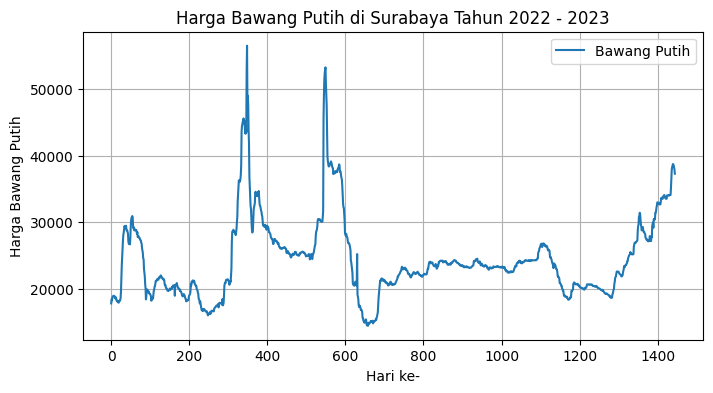

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(putih['Harga'], label='Bawang Putih')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Putih')
plt.title('Harga Bawang Putih di Surabaya Tahun 2022 - 2023')
plt.grid(True)
plt.legend()

In [ ]:
Datates = 125
trainputih = putih.iloc[:-Datates] #52%
testputih = putih.iloc[-Datates:] #48%

In [ ]:
trainputih

,Tanggal,Harga
0,02/ 01/ 2018,17850
1,03/ 01/ 2018,18450
2,04/ 01/ 2018,18300
3,05/ 01/ 2018,18750
4,08/ 01/ 2018,18900
...,...,...
1315,17/ 01/ 2023,23350
1316,18/ 01/ 2023,23300
1317,19/ 01/ 2023,23550
1318,20/ 01/ 2023,23600


In [ ]:
testputih

,Tanggal,Harga
1320,24/ 01/ 2023,23750
1321,25/ 01/ 2023,23850
1322,26/ 01/ 2023,24150
1323,27/ 01/ 2023,24150
1324,30/ 01/ 2023,24550
...,...,...
1440,11/ 07/ 2023,38700
1441,12/ 07/ 2023,38550
1442,13/ 07/ 2023,38250
1443,14/ 07/ 2023,37950


In [ ]:
print ('Results of Dicky-Fuller Test data Harga Bawang Putih : ')
dftest = adfuller(putih['Harga'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P=value', '#Lags Used', 'Number pf Observations Use'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key] = value
  print(dfoutput)

Results of Dicky-Fuller Test data Harga Bawang Putih : 
Test Statistic                  -3.173380
P=value                          0.021578
#Lags Used                      13.000000
Number pf Observations Use    1431.000000
Critical value (1%)             -3.434928
dtype: float64
Test Statistic                  -3.173380
P=value                          0.021578
#Lags Used                      13.000000
Number pf Observations Use    1431.000000
Critical value (1%)             -3.434928
Critical value (5%)             -2.863562
dtype: float64
Test Statistic                  -3.173380
P=value                          0.021578
#Lags Used                      13.000000
Number pf Observations Use    1431.000000
Critical value (1%)             -3.434928
Critical value (5%)             -2.863562
Critical value (10%)            -2.567846
dtype: float64


In [ ]:
Q1 = np.quantile(putih['Harga'], .25)
Q3 = np.quantile(putih['Harga'], .75)
print(Q1)
print(Q3)

20600.0
26750.0


# **Variabel**

In [ ]:
alpha_manual = 0.1 #alpha manual
test_putih = np.zeros(len(testputih))
kons_p = np.zeros(len(trainputih))
slope_p = np.zeros(len(trainputih))

# **Perhitungan Nilai Dasar Untuk Data Bawang Putih**

In [ ]:
Bt_p = np.zeros(len(trainputih))
weights = [5, 4, 3, 2, 1]
Bt_p = trainputih['Harga'].rolling(5).apply(lambda data: np.dot(data, weights) / sum(weights), raw = True)

Bt_p

0                NaN
1                NaN
2                NaN
3                NaN
4       18290.000000
            ...     
1315    22823.333333
1316    23060.000000
1317    23250.000000
1318    23416.666667
1319    23426.666667
Name: Harga, Length: 1320, dtype: float64

# **Pemulusan Golden Section Bawang Putih**

In [ ]:
r = 0.61803
a = 0
d = 1
epsilon = 0.00000001
iter = 50
r = (-1+math.sqrt(5))/2
k = 0
b = r * a + (1 - r) * d
c = a + d - b
while ((abs(d-a) > epsilon) and (k < iter)):
    k = k + 1
    fb = bdesmodel(trainputih, b, slope_p, kons_p, test_putih, Bt_p)
    mapefb = mape(testputih['Harga'], test_putih)
    fc = bdesmodel(trainputih, c, slope_p, kons_p, test_putih, Bt_p)
    mapefc = mape(testputih['Harga'], test_putih)
    if(mapefb < mapefc):
        d = c
        c = b
        b = r * a + (1 - r) * d
    else:
        a = b
        b = c
        c = a + d - b

alpha_optimal_putih = a + d /2

print(a)
print(r)
print(b)
print(alpha_optimal_putih)

0.7774999888025185
0.6180339887498949
0.7774999915034122
1.166249986739286


In [ ]:
x1 = a*r + (1-r)*b
print(x1)

x2 = a+b-x1
print(x2)

0.7774999898341681
0.7774999904717625


In [ ]:
print(b)
print(c)

0.7774999915034122
0.7774999931726414


# **Prediksi Bawang Putih Dengan Alpha Manual**

In [ ]:
prediksi = bdesmodel(trainputih, alpha_manual, slope_p, kons_p, test_putih, Bt_p)
trainputih = trainputih.assign(alpha_optimal_putih = prediksi)
testputih = testputih.assign(alpha_optimal_putih = test_putih)

In [ ]:
trainputih

,Tanggal,Harga,alpha_optimal_putih
0,02/ 01/ 2018,17850,17850.000000
1,03/ 01/ 2018,18450,18450.000000
2,04/ 01/ 2018,18300,18300.000000
3,05/ 01/ 2018,18750,18750.000000
4,08/ 01/ 2018,18900,18412.000000
...,...,...,...
1315,17/ 01/ 2023,23350,22928.666667
1316,18/ 01/ 2023,23300,23108.000000
1317,19/ 01/ 2023,23550,23310.000000
1318,20/ 01/ 2023,23600,23453.333333


In [ ]:
testputih

,Tanggal,Harga,alpha_optimal_putih
1320,24/ 01/ 2023,23750,23461.333333
1321,25/ 01/ 2023,23850,23463.066667
1322,26/ 01/ 2023,24150,23464.800000
1323,27/ 01/ 2023,24150,23466.533333
1324,30/ 01/ 2023,24550,23468.266667
...,...,...,...
1440,11/ 07/ 2023,38700,23669.333333
1441,12/ 07/ 2023,38550,23671.066667
1442,13/ 07/ 2023,38250,23672.800000
1443,14/ 07/ 2023,37950,23674.533333


In [ ]:
mape(trainputih['Harga'], trainputih['alpha_optimal_putih'])

1.5718358079888057

In [ ]:
mape(testputih['Harga'], test_putih)

21.00302792670947

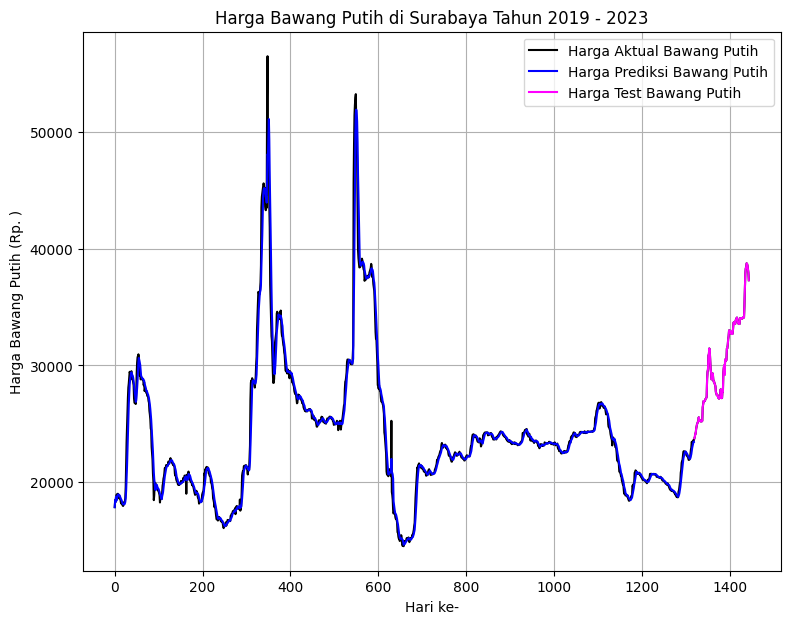

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(putih['Harga'], label='Harga Aktual Bawang Putih', color='black')
plt.plot(trainputih['alpha_optimal_putih'], label='Harga Prediksi Bawang Putih', color='blue')
plt.plot(testputih['Harga'], label='Harga Test Bawang Putih', color='magenta')

plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Putih (Rp. )')
plt.title('Harga Bawang Putih di Surabaya Tahun 2019 - 2023')
plt.grid(True)
plt.legend()

In [ ]:
prediksi_depan(periodedepanputih, kons_p, slope_p, testputih, panjangprediksi)

In [ ]:
dataprediksi_p = pd.DataFrame(index)
dataprediksi_p['prediksi']= periodedepanputih
dataprediksi_p = dataprediksi_p.rename(columns = {0: "index"})
dataprediksi_p = dataprediksi_p.set_index("index")
dataprediksi_p

,prediksi
index,
1445,23676.266667
1446,23678.000000
1447,23679.733333
1448,23681.466667
1449,23683.200000
...,...
1805,24300.266667
1806,24302.000000
1807,24303.733333


In [ ]:
testputih

,Tanggal,Harga,alpha_optimal_putih
1320,24/ 01/ 2023,23750,23461.333333
1321,25/ 01/ 2023,23850,23463.066667
1322,26/ 01/ 2023,24150,23464.800000
1323,27/ 01/ 2023,24150,23466.533333
1324,30/ 01/ 2023,24550,23468.266667
...,...,...,...
1440,11/ 07/ 2023,38700,23669.333333
1441,12/ 07/ 2023,38550,23671.066667
1442,13/ 07/ 2023,38250,23672.800000
1443,14/ 07/ 2023,37950,23674.533333


In [ ]:
trainputih

,Tanggal,Harga,alpha_optimal_putih
0,02/ 01/ 2018,17850,17850.000000
1,03/ 01/ 2018,18450,18450.000000
2,04/ 01/ 2018,18300,18300.000000
3,05/ 01/ 2018,18750,18750.000000
4,08/ 01/ 2018,18900,18412.000000
...,...,...,...
1315,17/ 01/ 2023,23350,22928.666667
1316,18/ 01/ 2023,23300,23108.000000
1317,19/ 01/ 2023,23550,23310.000000
1318,20/ 01/ 2023,23600,23453.333333


In [ ]:
print('Harga Bawang Putih tertinggi = ',putih["Harga"].max())
print('Harga Bawang Putih rata-rata =', putih["Harga"].mean())
print('Harga Bawang Putih terendah = ',putih["Harga"].min())

Harga Bawang Putih tertinggi =  56500
Harga Bawang Putih rata-rata = 24462.53633217993
Harga Bawang Putih terendah =  14500


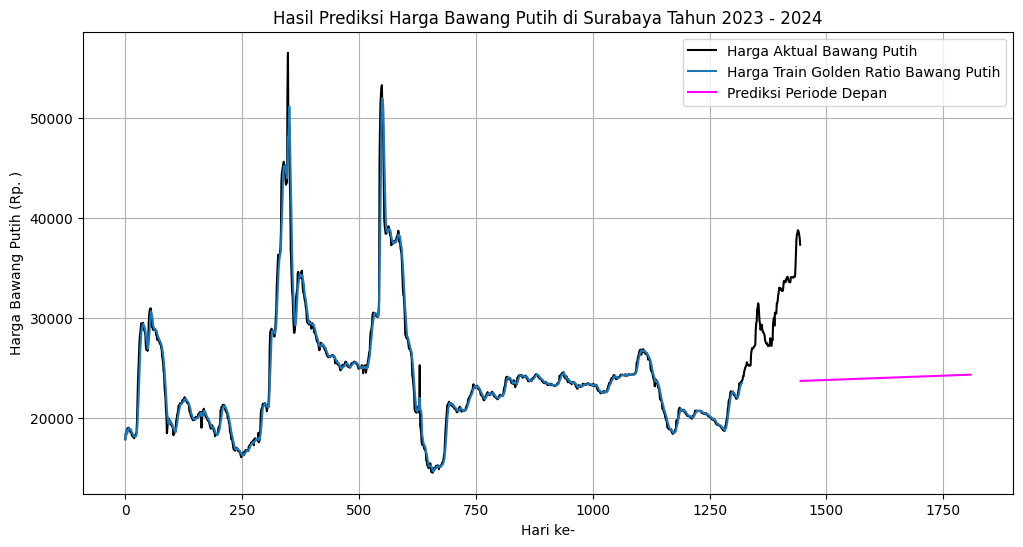

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(putih['Harga'], label='Harga Aktual Bawang Putih', color='black')
#plt.plot(testputih['Harga'], label='Harga Test Bawang Putih')
plt.plot(trainputih['alpha_optimal_putih'], label='Harga Train Golden Ratio Bawang Putih')
plt.plot(dataprediksi_p['prediksi'], label='Prediksi Periode Depan', color='magenta')
plt.xlabel('Hari ke-')
plt.ylabel('Harga Bawang Putih (Rp. )')
plt.title('Hasil Prediksi Harga Bawang Putih di Surabaya Tahun 2023 - 2024')
plt.grid(True)
plt.legend()

In [ ]:
dataprediksi_p

,prediksi
index,
1445,23676.266667
1446,23678.000000
1447,23679.733333
1448,23681.466667
1449,23683.200000
...,...
1805,24300.266667
1806,24302.000000
1807,24303.733333


In [ ]:
mape(trainputih['Harga'], trainputih['alpha_optimal_putih'])

1.5718358079888057

In [ ]:
mape(testputih['Harga'], test_putih)

21.00302792670947